'''EDA
1. Intro - 3 para  +  3 images
2. Problem Defination
3. Setup - Libraries
4. Data Acq
5. PreProfiling - know what is the mistake
6. PreProcessing - correct the mistakes
7. PostProfiling - Trust but Verify
8. EDA - asking the right "RRnV" questions - 15 +- 5
9. Summary - Actionable Insights - PREP
'''

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Acquistion**](#Section41)<br>
  - **4.2** [**Data Information**](#Section42)<br>
  - **4.3** [**Data Description**](#Section43)<br>
  - **4.4** [**Number of Uniques**](#Section44)<br>
  
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
# **1. Introduction**
---

India's telecommunication network is the second largest in the world by number of telephone users (both fixed and mobile phone). The Total subscriber base, wireless subscription as well as wired broadband subscription have grown consisstently Tele-density stood at __84.56%__. as of December 2022,total broadband subscriptions grew to 832.2 million until Dec'2022 and the total subscriber base stood at 1170.38 million in Dec'2022.

India has the __world's second-largest Internet user-base__ with 747.41 million broadband internet subscribers in the country.
Highest data usage per smartphone is at an average of __9.8 GB per Month__. 

With 70% of population staying in rural areas & with rural subscribers forming __43.69%__ of the total telephone subscribers of Jan 2020. India's rural market will be the key to growth in the coming years. Government of India unreeled the __National Broadland Mission__ with an aim to provide Broadland access to all villages by 2022.

Gross Revenue of the telecom sector stood at Rs. 76.408 Crore (US$ 9.3 Billion) in the first quarter of FY23. Total wireless data usage in India grew at a rate of 6.65% from 37,626 PB in Sep'2021 to 40,126 PB in Sep'2022. Contribution of 2G, 3G & 4G data usage to the total volume of wireless data usage was at 0.16%, 1.02% and 98.81%.

Revenue of telecommunications services industry in India from 2020 to 2022 with forecasts until 2025(in trillion Indian rupees)
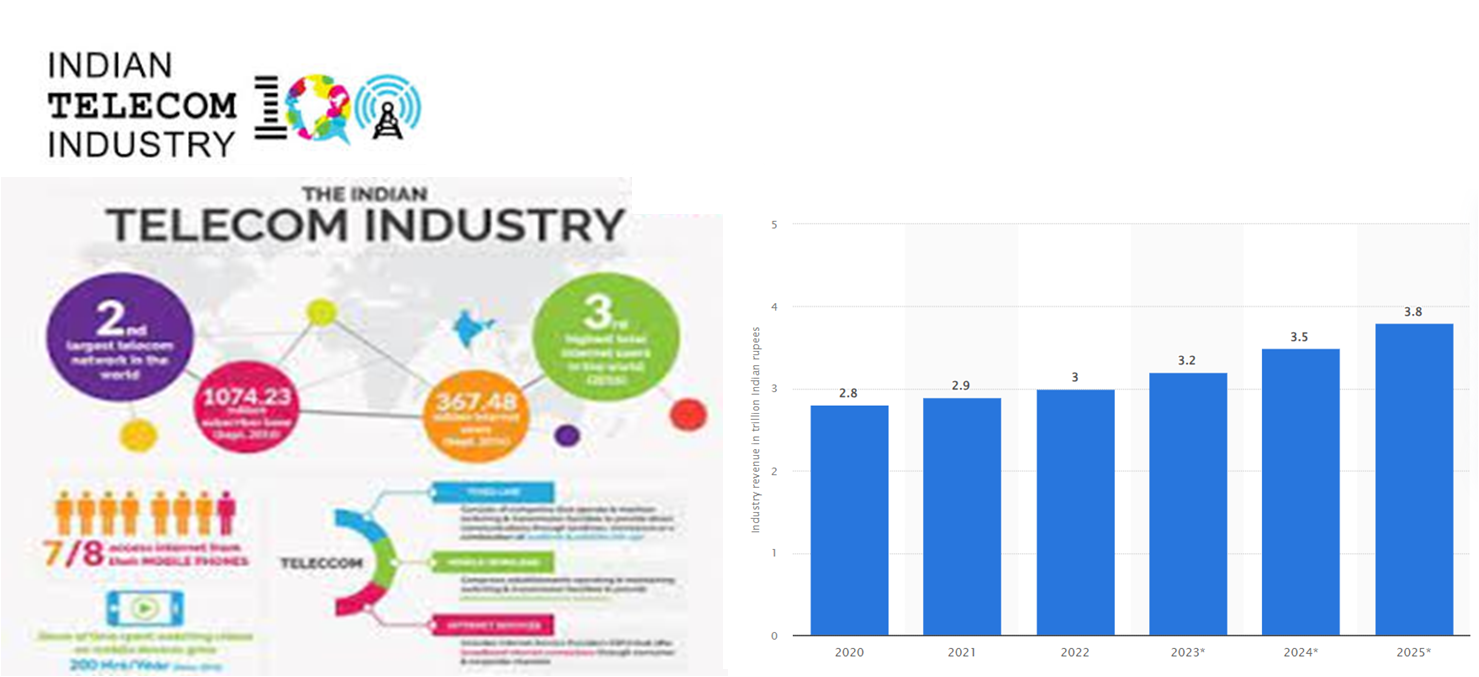



India added over 500 Mn new smartphone users over the last decade. We are expected to have __850 Mn__smartphone users by 2026, representing ~55% of the total population.

---
# **2. Problem Statement**
---

- __AccredianTelecom__, one of the leading telecom players, understands that customizing offerings is very important for its 
business to stay competitive.
- Currently, AccredianTelecom is seeking to leverage behavioural data from more than 60% of the 50 million mobile devices active
daily in India
- They are doing this to help their clients better understand and interact with their audiences.
- In this assignment, Accredianians are expected to build a dashboard which will help us to understand a user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties.
- Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts. These efforts are relevant to their users and cater to their preferences.

---
# **3. Installing & Importing Libraries**
---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pip intall mysql-connector-python   #Install MySQL connector Module

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "intall" - maybe you meant "install"



__Arguments required to connect:__

- Install MySQL Connector module. 
- Use the Pip command to install MySQL Connector
- Import MySQL Connector module. 
- Import using a import mysql..
- Use the connect() method..
- Use the cursor() method..
- Use the execute() method..
- Extract result using fetchall()..
- Close Cursor and connection objects

In [3]:
import mysql.connector   #Import MySQL connector Module

---
# **4. Data Acquisition & Description**
---

## **4.1. Data Acquistion**

In [4]:
connection = mysql.connector.connect(
host = "cpanel.insaid.co",
user = "student", 
passwd = "student",
database="Capstone1") #Use Connect() method of a mysql connection object to create a cursor obj to perform various sql oper

In [5]:
cursor = connection.cursor() #Allows python code to execute postgrSQL command in a database session
#To Create Cursor object to perform various sql operationsquery = "SHOW TABLES in Capstone1"

In [6]:
query = "SHOW TABLES in Capstone1"

In [7]:
cursor.execute(query) #Execute() methods run the sql query and return the result
result = cursor.fetchall() #Cursor.fetchall() | fetchone() | fetchmany() to read query result
print(result)

[('events_data',), ('gender_age_train',), ('phone_brand_device_model',)]


In [8]:
#Gender_age_train - df1

query1 = f"Select * from {'gender_age_train'}"
cursor.execute(query1)
result1 = cursor.fetchall()

column_names1 = [desc[0] for desc in cursor.description]
print(column_names1)

df1 = pd.DataFrame(result1, columns = column_names1)
df1.head()

['device_id', 'gender', 'age', 'group']


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [9]:
#phone_brand_device_model

query2 = f"Select * from {'phone_brand_device_model'}"
cursor.execute(query2)

result2 = cursor.fetchall()

column_names2 = [desc[0] for desc in cursor.description]
print(column_names2)

df2 = pd.DataFrame(result2, columns = column_names2)
df2.head()

['device_id', 'phone_brand', 'device_model']


,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [10]:
event_data = pd.read_csv("C:/Users/HP/Downloads/events_data.csv") #Read the data from CSV to make a Dataframe

In [11]:
event_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


__Summary of Data Acquisition:__
- This Data Set consists of 3 Data Frame with Device id, event id, gender, age & their group, Longitude & Latitude, 
city, state, Phone Brand.

### **Dataframe 1 : Gender_Age**
| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 74645 | 4 | 2.3 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Device ID | Device ID uniquely assigned to each phone device |
|2| Gender | Gender of the User |
|3| Age |	Age of the User |
|4| Group |	Age Segment |

### **Dataframe 2 : Phone brand device Model**
| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 87726 | 3 | 2.0 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Device ID | Device ID uniquely assigned to each phone device |
|2| Phone Brand | Brand of the Phone |
|3| Device Model | Model in that Phone Brand |

### **Dataframe 3 : Event Data**
| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 3252950 | 7 | 173.7 MB | 

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Event ID | Event ID uniquely assigned to each actiivty in the phone device |
|2| Device ID | Device ID uniquely assigned to each phone device |
|3| Timestamp | Denotes the Date & Time of the event occured |
|4| Longitude | Denotes the Longitude in which event occured|
|5| Latitude | Denotes the Latitude in which event occured|
|6| City | City in which the event occured |
|7| State |State in which the event occured |

## **4.2. Data Information**

In [12]:
df1.info() #To find values count & Datatype about paramters in Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


__Observation for df1:__
- 4 Columns : Device ID, Gender, Age & Group
- No Null Values : 74645
- Data Types are OK 

In [13]:
df2.info() #To find values count & Datatype about parameter in Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


__Observations for df2:__
- 3 Columns : Device ID, Phone Brand & Device Model
- No Null Values (87726)
- No Datatype issue

In [14]:
event_data.info() #To confirm datatype of paramters in Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


__Observations for Event Data:__
- Device Id is in float which is __Integer__ in previous 2 dataframe
- Timestamp is in Object which should be in __datetime__ format

In [15]:
event_data['timestamp'] = pd.to_datetime(event_data['timestamp'])

In [16]:
event_data.info() #To Verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   event_id   int64         
 1   device_id  float64       
 2   timestamp  datetime64[ns]
 3   longitude  float64       
 4   latitude   float64       
 5   city       object        
 6   state      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 173.7+ MB


## **4.3. Data Description**

In [17]:
df1.describe() #To confirm parameters of Numerical data in Dataframe

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


__Observation for df1:__
- device_id can not be negative (Overall 37407 rows are negative) 
- Minimum Age can not be 1 & Maximum Age 96 (3 members are more than 90 Age)

In [18]:
df2.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


__Observation for df2:__
- Device ID is negative (Overall 44035 rows are negative) but will not have any impact on analysis

In [19]:
event_data.describe() 

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


__Observations for event data:__
- Device id is negative but no impact to analysis

## **4.4. Number of Uniques**

In [20]:
df1.nunique() # No. of Unqiue values in Data Frame

device_id    74645
gender           2
age             85
group           12
dtype: int64

__Observations for df1:__
- No Observation, everything OK

In [21]:
df2.nunique() #To find unique values in each column of dataframe

device_id       87726
phone_brand       116
device_model     1467
dtype: int64

__Observations from df2:__
- No issue identified
- Phone Brand alone need to ensure since Top 10 was listed in Project summary

In [22]:
event_data.nunique() #To find unique Values in each column

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60177
city             933
state             32
dtype: int64

__Observations from event data:__
- Missing values are there
- No other issues identified

## **5, 6 & 7. Data Pre-Profiling | Cleaning/Processing | Post Profiling**

## **5,6&7.1. Handling of Inconsistent Data**

__Action Taken for Gender Age Dataframe__
- No Null Values in each column
- All Datatypes are OK
- Age has __Outlier__ which was removed using IQR Method

In [23]:
df1[df1['age']>=90]

,device_id,gender,age,group
3704,6479053078455130840,M,90,M39+
5958,-7047596037344697961,F,96,F43+
60872,1177477789654193646,F,94,F43+


In [24]:
df1[df1['age']<=10]

,device_id,gender,age,group
10385,3553057874282315257,M,1,M22-
15107,6938624533893127783,M,10,M22-
33595,-4889920448730311,M,10,M22-
57703,7176076592180869049,M,10,M22-
60779,-8513863533705424532,M,6,M22-
60831,-5323874218045578676,M,6,M22-
60832,3646841514566479686,M,6,M22-
60833,5222152119137955379,M,6,M22-
72935,8016703601300649556,F,10,F23-
72936,8176239636159283150,F,10,F23-


__Age Outlier confirmed by Inter Quartile Range__
- IQR = Q3 - Q1 = 36 - 25 = 11
- Min = Q1 - 1.5*IQR = 25 - (1.5*11) = 25 - 16.5 = 8.5 (9)
- Max = Q3 + 1.5*IQR = 36 + (1.5*11) = 36 + 16.5 = 52.5

In [25]:
df1[~((df1['age']<8.5) | (df1['age']>52.5))] #Removed the Outlier value in Age

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


In [26]:
df1 = df1[~((df1['age']<8.5) | (df1['age']>52.5))]

__Action Taken for Phone Brand Device Model Dataframe__
- No Null Values in each column
- All Datatypes are OK
- Phone Brand has __116 Brand__ in which chinese character need to be replaced with English

In [27]:
df2["phone_brand"].unique() #To List unique values in Phone brand column

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [28]:
df2["phone_brand"].value_counts().head(10) #To confirm Top 10 Phone Brand

小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
魅族       5531
酷派       3979
HTC      1272
联想        982
乐视        841
Name: phone_brand, dtype: int64

- 小米 21645 - Xiaomi
- 三星 19211 - Samsung
- 华为 15181 - Huawei
- vivo 7596 - Vivo
- OPPO 6717 - Oppo
- 魅族 5531 - Meizu
- 酷派 3979 - Coolpad
- HTC 1272 - HTC
- 联想 982 - Lenovo
- 乐视 841 - LeEco

In [29]:
 #To replace Chinese Character of Phone Brand with English one based on Project Information
my_dict = {"小米":"Xiaomi", "三星":"Samsung" , "华为":"Huawei" , "vivo":"Vivo" , "OPPO":"Oppo" , "魅族":"Meizu" , "酷派":"Coolpad", "HTC":"HTC" , 
"联想 ":"Lenovo" , "乐视":"LeEco"}

In [30]:
for key, value in my_dict.items():
    df2 = df2.replace(key, value)
print(df2)

                 device_id phone_brand device_model
0      1877775838486905855        Vivo          Y13
1     -3766087376657242966      Xiaomi         V183
2     -6238937574958215831        Oppo          R7s
3      8973197758510677470     Samsung        A368t
4     -2015528097870762664      Xiaomi      红米Note2
...                    ...         ...          ...
87721 -4961458925928574032      Huawei       荣耀畅玩4X
87722 -8819817317449262375      Huawei          荣耀6
87723 -3358291377416935026      Huawei        荣耀畅玩4
87724  3282788959750981633      Xiaomi         MI 2
87725  2491639413207286271          酷比           M1

[87726 rows x 3 columns]


## **5,6&7.2. Handling of Missing Data**

In [31]:
event_data.count()

event_id     3252950
device_id    3252497
timestamp    3252950
longitude    3252527
latitude     3252527
city         3252950
state        3252573
dtype: int64

In [32]:
event_data.shape[0]-event_data.count() #To confirm missing values in each column

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

__Observations for event data:__
- There are some missing values in Device Id, Longitude, Latitude and state

In [33]:
event_data[pd.isnull(event_data["state"])] #To retrieve state with Nan Values

,event_id,device_id,timestamp,longitude,latitude,city,state
2931,706554,-5.829328e+18,2016-05-05 16:58:46,73.851671,18.593313,Pune,NaN
16243,1918653,3.137054e+18,2016-05-03 00:46:10,83.326714,17.829748,Visakhapatnam,NaN
26956,1068940,-1.752057e+18,2016-05-04 16:09:17,75.930969,22.818845,Indore,NaN
30889,2164200,-3.945827e+17,2016-05-04 19:33:09,83.366564,17.757190,Visakhapatnam,NaN
32685,460124,5.536513e+18,2016-05-01 21:30:10,80.359796,13.128174,Chennai,NaN
...,...,...,...,...,...,...,...
3210326,1070365,-5.858653e+18,2016-05-07 17:03:06,88.619418,25.484459,Gangarampur,NaN
3226848,145171,4.620271e+18,2016-05-07 20:38:45,87.812710,22.957980,Arambagh,NaN
3235317,210361,-8.340098e+18,2016-05-05 20:53:20,77.305988,28.688980,Delhi,NaN
3236931,2738361,4.113023e+18,2016-05-02 18:15:04,75.906533,22.732515,Indore,NaN


In [34]:
citytostate = event_data.dropna(subset=["state"]).set_index("city")["state"].to_dict()

def fill_state_based_on_city(row):
    if pd.isnull(row["state"]):
        return citytostate.get(row["city"])
    return row["state"]

event_data["state"] = event_data.apply(fill_state_based_on_city, axis=1)
event_data.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

In [35]:
#To retrive Longitude with Nan values
event_data[pd.isnull(event_data["longitude"])] 

,event_id,device_id,timestamp,longitude,latitude,city,state
8015,2929521,1.779631e+18,2016-05-05 01:15:22,NaN,NaN,Delhi,Delhi
9697,1017749,-8.790560e+18,2016-05-03 17:22:52,NaN,NaN,Indore,MadhyaPradesh
10949,2132415,4.865607e+18,2016-05-07 19:57:06,NaN,NaN,Visakhapatnam,AndhraPradesh
16038,926804,7.983871e+18,2016-05-03 12:29:47,NaN,NaN,Chennai,TamilNadu
20586,3074782,-7.364841e+18,2016-05-04 19:39:28,NaN,NaN,Pune,Maharashtra
...,...,...,...,...,...,...,...
3226082,1955966,6.774071e+18,2016-05-06 01:10:38,NaN,NaN,Moga,Punjab
3240057,2318768,1.779631e+18,2016-05-06 09:22:44,NaN,NaN,Delhi,Delhi
3240304,2387314,-7.364841e+18,2016-05-05 06:20:46,NaN,NaN,Pune,Maharashtra
3246545,2857050,4.580179e+18,2016-05-07 14:25:41,NaN,NaN,Jaipur,Rajasthan


In [36]:
devicetolongitude = event_data.dropna(subset=["longitude"]).set_index("device_id")["longitude"].to_dict()

#Function to fill missing longitude values based on the device id:

def fill_longitude_based_on_device_id(row):
    if pd.isnull(row["longitude"]):
        return devicetolongitude.get(row["device_id"])
    return row["longitude"]

#Apply the function to fill missing longitude values

event_data["longitude"] = event_data.apply(fill_longitude_based_on_device_id, axis = 1)
event_data.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude      0
latitude     423
city           0
state          0
dtype: int64

In [37]:
#To retrive Latitude with Nan values
event_data[pd.isnull(event_data["latitude"])]

,event_id,device_id,timestamp,longitude,latitude,city,state
8015,2929521,1.779631e+18,2016-05-05 01:15:22,77.235416,NaN,Delhi,Delhi
9697,1017749,-8.790560e+18,2016-05-03 17:22:52,75.933778,NaN,Indore,MadhyaPradesh
10949,2132415,4.865607e+18,2016-05-07 19:57:06,83.351442,NaN,Visakhapatnam,AndhraPradesh
16038,926804,7.983871e+18,2016-05-03 12:29:47,80.335435,NaN,Chennai,TamilNadu
20586,3074782,-7.364841e+18,2016-05-04 19:39:28,73.931944,NaN,Pune,Maharashtra
...,...,...,...,...,...,...,...
3226082,1955966,6.774071e+18,2016-05-06 01:10:38,75.268748,NaN,Moga,Punjab
3240057,2318768,1.779631e+18,2016-05-06 09:22:44,77.235416,NaN,Delhi,Delhi
3240304,2387314,-7.364841e+18,2016-05-05 06:20:46,73.931944,NaN,Pune,Maharashtra
3246545,2857050,4.580179e+18,2016-05-07 14:25:41,75.835756,NaN,Jaipur,Rajasthan


In [38]:
devicetolatitude = event_data.dropna(subset=["latitude"]).set_index("device_id")["latitude"].to_dict()
def fill_latitude_based_on_device_id(row):
    if pd.isnull(row["latitude"]):
        return devicetolatitude.get(row["device_id"])
    return row["latitude"]

event_data["latitude"] = event_data.apply(fill_latitude_based_on_device_id, axis = 1)
event_data.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude      0
latitude       0
city           0
state          0
dtype: int64

In [39]:
#To retrieve Device ID with Nan Values
event_data[pd.isnull(event_data["device_id"])]

,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh
26367,2659282,NaN,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan
42088,442198,NaN,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan
43061,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh
44823,3227383,NaN,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab
...,...,...,...,...,...,...,...
3212337,2191286,NaN,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh
3215120,572054,NaN,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh
3230115,332451,NaN,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab
3235494,2534073,NaN,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh


In [40]:
deviceidtolongitude = event_data.dropna(subset=["device_id"]).set_index("longitude")["device_id"].to_dict()

def fill_device_id_based_on_longitude(row):
    if pd.isnull(row["device_id"]):
        return deviceidtolongitude.get(row["longitude"])
    return row["device_id"]

event_data["device_id"] = event_data.apply(fill_device_id_based_on_longitude, axis = 1)
event_data.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

## **5,6&7.3. Handling of Redundant Data**

In [41]:
#To Confirm same Latitude & Longitude for different city
event_data.groupby(["latitude","longitude"])['city'].nunique().sort_values(ascending = False) 

latitude   longitude
34.555300  69.207500    7
25.204800  55.270800    7
41.871900  12.567400    6
22.926056  88.442364    1
22.924140  88.459493    1
                       ..
17.791044  83.315325    1
17.791091  83.371133    1
17.791113  83.338752    1
17.791254  83.354599    1
21.021731  72.995695    1
Name: city, Length: 60869, dtype: int64

In [42]:
event_data.drop(event_data[(event_data['longitude'] == 55.270800) & (event_data['latitude'] == 25.204800)].index, inplace = True)

In [43]:
event_data.drop(event_data[(event_data['longitude'] == 69.207500) & (event_data['latitude'] == 34.555300)].index, inplace = True)

In [44]:
event_data.drop(event_data[(event_data['longitude'] <= 12.567400) & (event_data['latitude'] >= 41.871900)].index, inplace = True)

In [45]:
event_data.drop(event_data[event_data['longitude']<=60].index, inplace = True)

In [46]:
event_data.drop(event_data[(event_data['longitude'] <= 70) & (event_data['latitude'] >= 30)].index, inplace = True)

In [47]:
#To verify same Latitude & Longitude for different city
event_data.groupby(["latitude","longitude"])['city'].nunique().sort_values(ascending = False)

latitude   longitude
8.190110   77.511124    1
22.925966  88.636865    1
22.923575  88.430708    1
22.924135  74.321077    1
22.924140  88.459493    1
                       ..
17.791017  83.366852    1
17.791044  83.315325    1
17.791091  83.371133    1
17.791113  83.338752    1
34.391257  74.563104    1
Name: city, Length: 60865, dtype: int64

In [48]:
event_data.groupby(["city"]).nunique() #To find unique values in each column w.r.t city

,event_id,device_id,timestamp,longitude,latitude,state
city,,,,,,
Abohar,869,28,865,28,28,1
Achalpur,630,34,627,34,34,1
Adilabad,1010,31,1004,31,31,1
Adityapur,462,27,449,27,27,1
Adoni,930,37,918,37,37,1
...,...,...,...,...,...,...
Yadgir,1013,35,1010,35,35,1
Yamunanagar,496,24,492,24,24,1
Yavatmal,643,30,638,30,30,1


## **5,6&7.4. Merging of Dataframe**

In [49]:
df = pd.merge(df1, df2 , on="device_id", how = "outer") #To merge both Dataframe
df

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35.0,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35.0,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35.0,M32-38,Xiaomi,MI 2
3,-4938849341048082022,M,30.0,M29-31,Samsung,Galaxy S4
4,245133531816851882,M,30.0,M29-31,SUGAR,时尚手机
...,...,...,...,...,...,...
87749,-5253673913132026479,NaN,NaN,NaN,Xiaomi,红米note
87750,-8513863533705424532,NaN,NaN,NaN,Meizu,MX3
87751,4122749178954465145,NaN,NaN,NaN,Huawei,荣耀3C
87752,-1016876635333702458,NaN,NaN,NaN,Samsung,Galaxy S3


In [50]:
df.count() #To identify missing values after merge

device_id       87754
gender          71485
age             71485
group           71485
phone_brand     87726
device_model    87726
dtype: int64

__Observation:__
- Gender & Age has missing values after merge

In [51]:
#To make final date which is available in all dataframe 
df_final = df[df.device_id.isin(event_data.device_id)]

In [52]:
df_final.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 87753
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     60865 non-null  int64  
 1   gender        58254 non-null  object 
 2   age           58254 non-null  float64
 3   group         58254 non-null  object 
 4   phone_brand   60865 non-null  object 
 5   device_model  60865 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.3+ MB


In [53]:
df_final.shape[0]-df_final.count()

device_id          0
gender          2611
age             2611
group           2611
phone_brand        0
device_model       0
dtype: int64

In [54]:
df_final["age"] = df_final["age"].fillna(round(df_final["age"].mean()))

In [55]:
df_final['age'].value_counts()

30.0    5652
26.0    3660
27.0    3634
29.0    3543
28.0    3307
25.0    3015
24.0    2852
23.0    2501
31.0    2446
22.0    2429
21.0    2375
32.0    2200
34.0    2128
33.0    2036
20.0    1914
35.0    1650
37.0    1325
19.0    1317
36.0    1300
38.0    1131
39.0    1028
40.0     945
41.0     862
42.0     845
43.0     832
46.0     790
44.0     754
45.0     748
18.0     592
47.0     546
48.0     539
50.0     379
49.0     372
51.0     346
17.0     321
52.0     321
16.0     127
15.0      49
14.0      28
12.0      11
13.0      10
11.0       3
10.0       2
Name: age, dtype: int64

In [56]:
df_final["group"] = df_final["group"].fillna("M29-31")

In [57]:
df_final['gender'].value_counts()

M    37718
F    20536
Name: gender, dtype: int64

In [58]:
df_final["gender"] = df_final["gender"].fillna("M")

In [59]:
df_final.shape[0]-df_final.count()

device_id       0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [60]:
df_final[df_final.device_id.isin(event_data.device_id)] #To verify the data

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35.0,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35.0,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35.0,M32-38,Xiaomi,MI 2
4,245133531816851882,M,30.0,M29-31,SUGAR,时尚手机
7,-8098239495777311881,M,38.0,M32-38,Xiaomi,MI 2S
...,...,...,...,...,...,...
87749,-5253673913132026479,M,30.0,M29-31,Xiaomi,红米note
87750,-8513863533705424532,M,30.0,M29-31,Meizu,MX3
87751,4122749178954465145,M,30.0,M29-31,Huawei,荣耀3C
87752,-1016876635333702458,M,30.0,M29-31,Samsung,Galaxy S3


In [61]:
event_data[event_data.device_id.isin(df_final.device_id)] #To verify the data in reverse

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh


In [62]:
#To concatenate both the Dataframe (df = df1 & df2 as well as event data)
pd.concat([event_data.set_index('device_id'),df_final.set_index('device_id')],axis=1).reset_index()

,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,2.973348e+18,2765368,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35.0,M32-38,优米,UIMI3
1,4.734221e+18,2955066,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30.0,M29-31,Vivo,X5M
2,-3.264500e+18,605968,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24.0,M23-26,Xiaomi,MI pad
3,5.731369e+18,448114,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26.0,M23-26,HTC,One max
4,3.388880e+17,665740,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30.0,M29-31,Xiaomi,MI 4
...,...,...,...,...,...,...,...,...,...,...,...,...
3252882,-1.937028e+18,2687452,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,F,38.0,F33-42,Xiaomi,红米1S
3252883,3.345851e+18,1051580,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,M,22.0,M22-,一加,One
3252884,-6.406040e+18,1316227,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi,M,37.0,M32-38,Samsung,Galaxy Grand 2
3252885,-2.920741e+18,381262,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,M,30.0,M29-31,Xiaomi,红米


In [63]:
#Assigned as Consolidated Dataframe "Consdf"
Consdf = pd.concat([event_data.set_index('device_id'),df_final.set_index('device_id')],axis=1).reset_index()

In [64]:
Consdf.head()

,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,2.973348e+18,2765368,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35.0,M32-38,优米,UIMI3
1,4.734221e+18,2955066,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30.0,M29-31,Vivo,X5M
2,-3.264500e+18,605968,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24.0,M23-26,Xiaomi,MI pad
3,5.731369e+18,448114,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26.0,M23-26,HTC,One max
4,3.388880e+17,665740,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30.0,M29-31,Xiaomi,MI 4


In [65]:
Consdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252887 entries, 0 to 3252886
Data columns (total 12 columns):
 #   Column        Dtype         
---  ------        -----         
 0   device_id     float64       
 1   event_id      int64         
 2   timestamp     datetime64[ns]
 3   longitude     float64       
 4   latitude      float64       
 5   city          object        
 6   state         object        
 7   gender        object        
 8   age           float64       
 9   group         object        
 10  phone_brand   object        
 11  device_model  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 297.8+ MB


In [66]:
Consdf.shape[0]-Consdf.count()

device_id       0
event_id        0
timestamp       0
longitude       0
latitude        0
city            0
state           0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [67]:
Consdf.nunique() #To find unqiue value in each column

device_id         60865
event_id        3252887
timestamp        588125
longitude         60091
latitude          60174
city                933
state                32
gender                2
age                  43
group                12
phone_brand         105
device_model       1386
dtype: int64

In [68]:
Consdf.groupby(['state']).nunique() #To find unique value in State Column

,device_id,event_id,timestamp,longitude,latitude,city,gender,age,group,phone_brand,device_model
state,,,,,,,,,,,
AndamanandNicobarIslands,41,1515,1505,41,41,1,2,21,12,10,37
AndhraPradesh,4929,321370,236364,4906,4912,104,2,41,12,69,705
ArunachalPradesh,32,608,603,32,32,1,2,15,10,10,30
Assam,483,12021,11738,483,483,15,2,36,12,23,213
Bihar,1372,35466,33890,1372,1372,43,2,38,12,43,408
Chandigarh,35,894,884,35,35,1,2,20,12,9,31
Chhattisgarh,400,9754,9576,400,400,12,2,36,12,23,197
Delhi,4909,751788,412095,4792,4786,10,2,37,12,61,632
Goa,76,3250,3203,76,76,3,2,26,12,12,58


In [69]:
Consdf.drop_duplicates(subset='device_id',inplace = False) #To drop duplicate values

,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,2.973348e+18,2765368,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35.0,M32-38,优米,UIMI3
1,4.734221e+18,2955066,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30.0,M29-31,Vivo,X5M
2,-3.264500e+18,605968,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24.0,M23-26,Xiaomi,MI pad
3,5.731369e+18,448114,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26.0,M23-26,HTC,One max
4,3.388880e+17,665740,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30.0,M29-31,Xiaomi,MI 4
...,...,...,...,...,...,...,...,...,...,...,...,...
3251794,-4.114379e+18,2437377,2016-05-06 21:19:09,80.290241,13.150984,Chennai,TamilNadu,F,25.0,F24-26,Samsung,黄金斗士A8
3251950,3.194728e+17,69286,2016-05-03 06:39:47,72.886717,19.049232,Mumbai,Maharashtra,F,33.0,F33-42,Xiaomi,MI 3
3252462,3.294038e+18,602171,2016-05-03 11:16:30,77.633307,13.065801,Bangalore,Karnataka,F,23.0,F23-,Oppo,R831S
3252731,5.838484e+18,2170713,2016-05-07 22:18:57,76.422242,26.947862,Daosa,Rajasthan,M,28.0,M27-28,Samsung,S880i


In [70]:
#Assigned as Unique Consolidated Dataframe as "Uniqueconsdf"
Uniqueconsdf = Consdf.drop_duplicates(subset='device_id',inplace = False)

In [71]:
Uniqueconsdf.head()

,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,2.973348e+18,2765368,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35.0,M32-38,优米,UIMI3
1,4.734221e+18,2955066,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30.0,M29-31,Vivo,X5M
2,-3.264500e+18,605968,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24.0,M23-26,Xiaomi,MI pad
3,5.731369e+18,448114,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26.0,M23-26,HTC,One max
4,3.388880e+17,665740,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30.0,M29-31,Xiaomi,MI 4


In [72]:
Uniqueconsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60865 entries, 0 to 3252735
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     60865 non-null  float64       
 1   event_id      60865 non-null  int64         
 2   timestamp     60865 non-null  datetime64[ns]
 3   longitude     60865 non-null  float64       
 4   latitude      60865 non-null  float64       
 5   city          60865 non-null  object        
 6   state         60865 non-null  object        
 7   gender        60865 non-null  object        
 8   age           60865 non-null  float64       
 9   group         60865 non-null  object        
 10  phone_brand   60865 non-null  object        
 11  device_model  60865 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 6.0+ MB


In [73]:
#Listed Top 10 Phone Brands
List = ["Xiaomi","Samsung","Huawei","Vivo","Oppo","Meizu","Coolpad","HTC","Lenovo","LeEco"]

In [74]:
#Assigned as Consolidated Unique values of Top 10 Phone brand data "Consdftop10"
Consdftop10 = Uniqueconsdf[Uniqueconsdf['phone_brand'].isin(List)]

In [75]:
Consdftop10.head()

,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
1,4.734221e+18,2955066,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30.0,M29-31,Vivo,X5M
2,-3.264500e+18,605968,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24.0,M23-26,Xiaomi,MI pad
3,5.731369e+18,448114,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26.0,M23-26,HTC,One max
4,3.388880e+17,665740,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30.0,M29-31,Xiaomi,MI 4
5,-5.124242e+17,1078723,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh,M,31.0,M29-31,Xiaomi,MI 2A


In [76]:
Consdftop10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57548 entries, 1 to 3252735
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     57548 non-null  float64       
 1   event_id      57548 non-null  int64         
 2   timestamp     57548 non-null  datetime64[ns]
 3   longitude     57548 non-null  float64       
 4   latitude      57548 non-null  float64       
 5   city          57548 non-null  object        
 6   state         57548 non-null  object        
 7   gender        57548 non-null  object        
 8   age           57548 non-null  float64       
 9   group         57548 non-null  object        
 10  phone_brand   57548 non-null  object        
 11  device_model  57548 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 5.7+ MB


__Final Dataframe for Visualization__
- Consdf = All Device id
- Uniqueconsdf = Unqiue Device id
- Consdftop10 - Unique Device id with Top 10 Phone Brand

__Observation__
- No Missing Values
- No duplicates in event id
- Different dataframe were made to start the EDA part

#_________________________________Now Data is ready for Analysis____________________________________________________________#

## **8. Exploratory Data Analysis**

__Rule__: Asking the Right Questions
- __R R nV__
    -    Reasonable to answer from the DataSet, 
    -    Relevant to the Problem Statement
    -   non Vague so that any two reasonable people will be able to understand it in same manner.

__Guidance:__ n Variable 
- Univariate - n questions
- Bivariate - nC2
- Trivariate - nC3
- n Variable - nCn 
   - No. of Possible Questions can be asked : 2**n - 1 (No need to ask them all) = 2**12 - 1 = 4095
   - Approriate no. of questions : 15 +- 5

__Strategy:__ How to ask the Questions
- Ask only Univariate Questions
- Bivariate
- Multi Variate

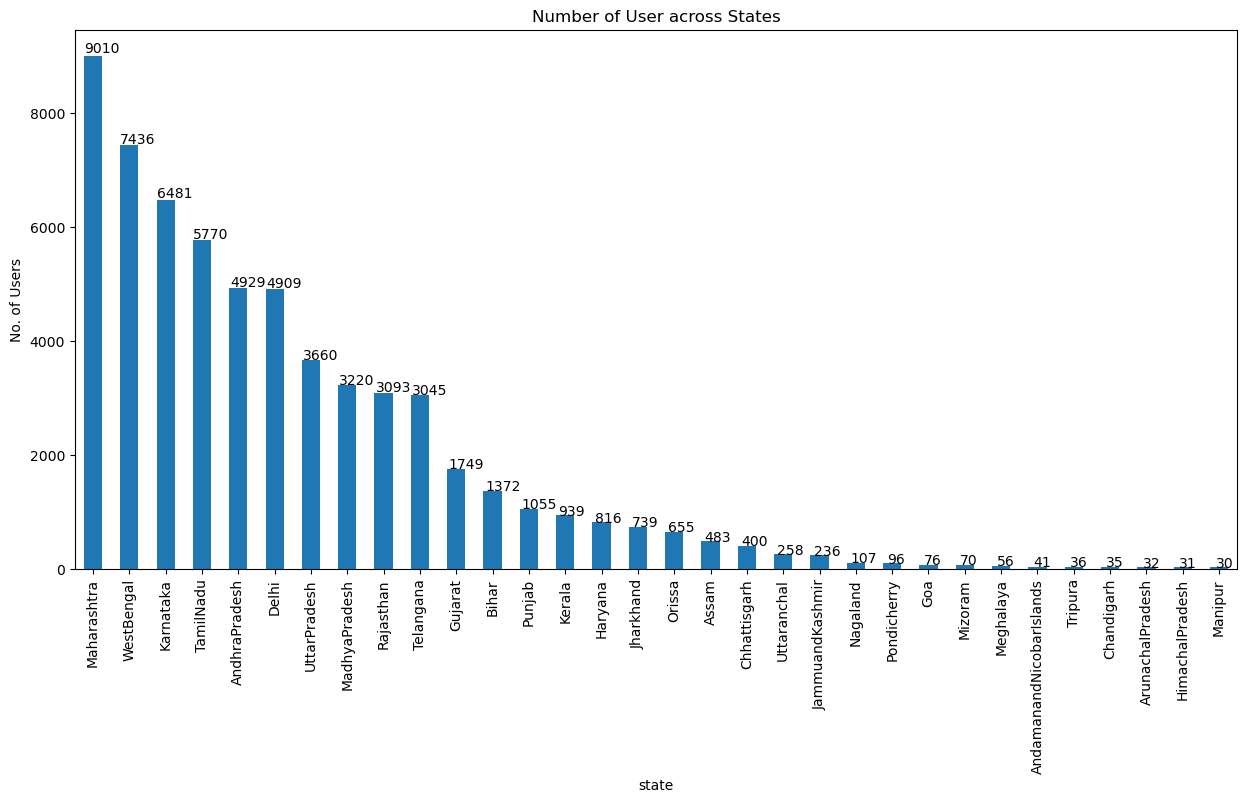

In [77]:
#Distribution of Users (device_id) across states
Bars = Uniqueconsdf['state'].value_counts().plot(kind='bar',figsize=(15,7),title ="Number of User across States")
plt.xlabel("state")
plt.ylabel("No. of Users")
for p in Bars.patches:
    Bars.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))
plt.show()

__Observations:__
- Maharastra has a Highest users followed by West Bengal, Karnataka, Tamilnadu, Andra Pradesh, Delhi, Uttrapradesh, Madhyapradesh, Rajasthan & Telangana
- Regions with Lowest user are mostly Northen east 


__Actionable Insight:__
- Maharastra has a Highest User. Suggest to focus on the Top 10 Cities by cutomizing the Offers to expand the Market
- For Regions with lowest user, Suggest to provide Customized offer considering ROI

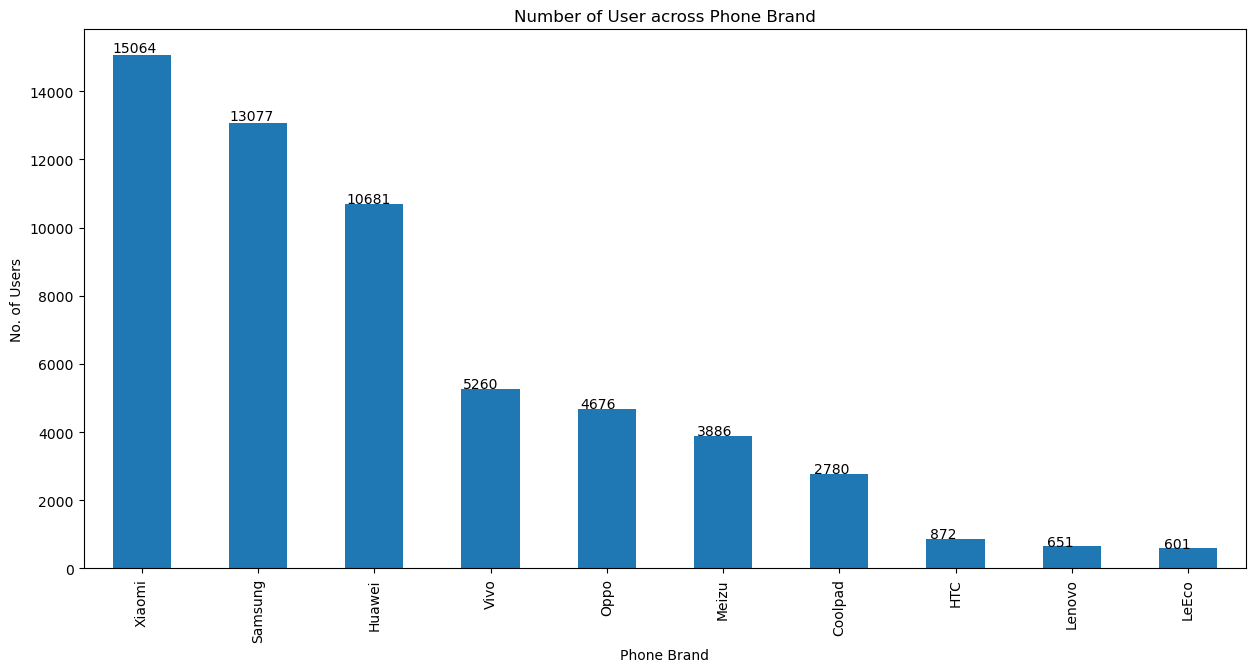

In [78]:
#Distribution of Users (device_id) across phone brand (Only Top 10 Phone Brands)
Barpb = Consdftop10['phone_brand'].value_counts().plot(kind='bar',figsize=(15,7),title ="Number of User across Phone Brand")
plt.xlabel("Phone Brand")
plt.ylabel("No. of Users")
for p in Barpb.patches:
    Barpb.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))
plt.show()

__Observations:__
- Top 3 Popular Brands are __Xiaomi, Samsung and Huawei__

__Actionable Insights:__
- Suggest to make a tie up with the popular Phone Brands to have a default Accredian Network SIM locked Mobile 
- Suggests to provide "Best Offers" for the New Users of these Phone Brands

<Axes: title={'center': 'Number of User across Gender'}, ylabel='gender'>

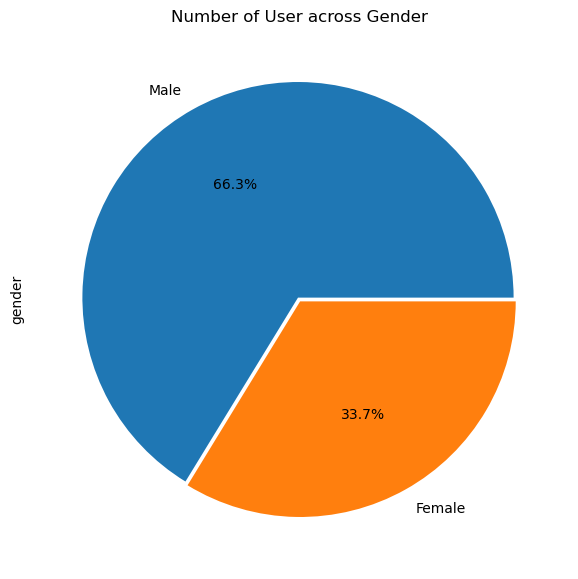

In [79]:
#Distribution of Users (device_id) across Gender
labels = "Male", "Female"
Uniqueconsdf['gender'].value_counts().plot(kind='pie',figsize=(15,7),labels=labels, title ="Number of User across Gender",explode =(0.01,0.01) ,autopct = '%1.1f%%')

__Observations:__
- Males Users are more

__Actionable Insights:__
- Roll Out more Customized offers for Females

In [80]:
#Distribution of phone Brands for each age segment (Considering Top 10 Phone Brands) 
data1 = Consdftop10[['group','phone_brand','device_id']]
dp = data1.groupby(['group','phone_brand'])['device_id'].count().unstack()
dp

phone_brand,Coolpad,HTC,Huawei,LeEco,Lenovo,Meizu,Oppo,Samsung,Vivo,Xiaomi
group,,,,,,,,,,
F23-,174,53,639,33,37,271,434,790,506,929
F24-26,139,41,557,34,21,177,310,696,368,867
F27-28,105,33,426,14,27,158,213,541,248,644
F29-32,149,50,667,37,27,205,333,865,325,937
F33-42,234,64,795,41,40,248,338,1060,352,1145
F43+,97,26,430,22,27,102,183,557,165,494
M22-,274,101,941,52,82,522,491,1092,585,1532
M23-26,332,113,1233,86,92,645,591,1554,674,2003
M27-28,213,65,721,42,45,333,338,945,352,1112


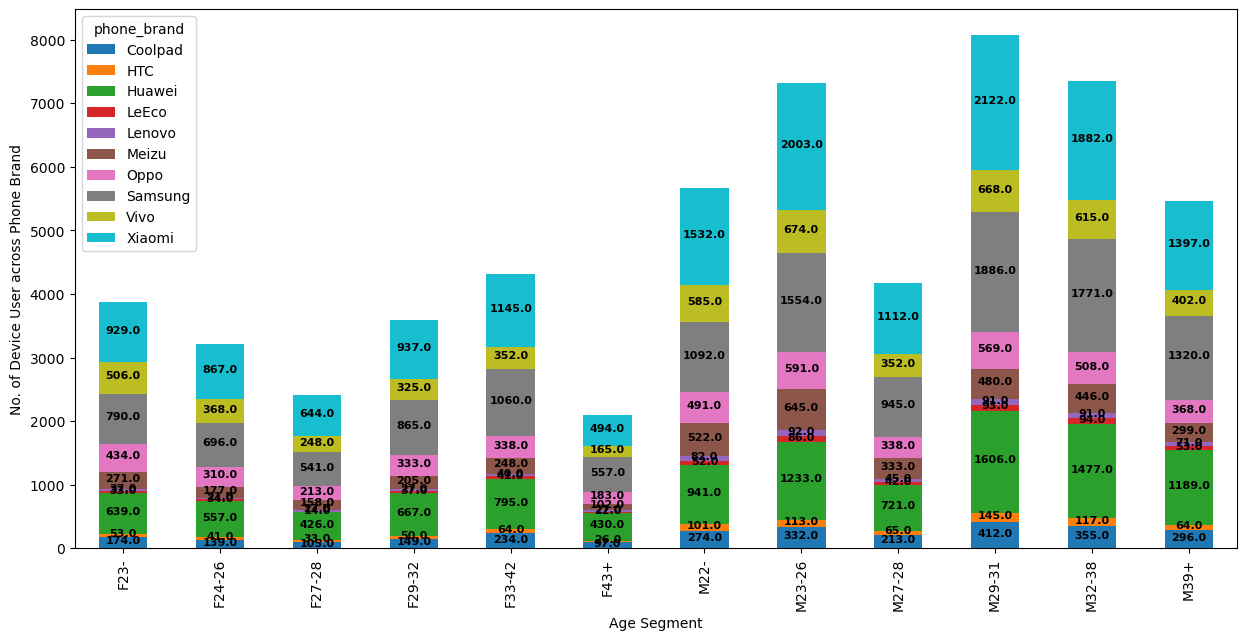

In [81]:
dp1 = dp.plot(kind='bar',figsize =(15,7),stacked=True)
dp1.set_xlabel("Age Segment")
dp1.set_ylabel("No. of Device User across Phone Brand")
y_offset = -15 #To put the annotation inside bar
for bar in dp1.patches:
    dp1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)

__Observations:__
- Top 3 Age segments are M29~31, M23~26 & M32~38 with Top 3 Phone Brand - Xiaomi, Samsung & Huawei
- Mostly Working Professional Category

__Actionable Insights:__
-   Tie up with Corporates - CUG Offer

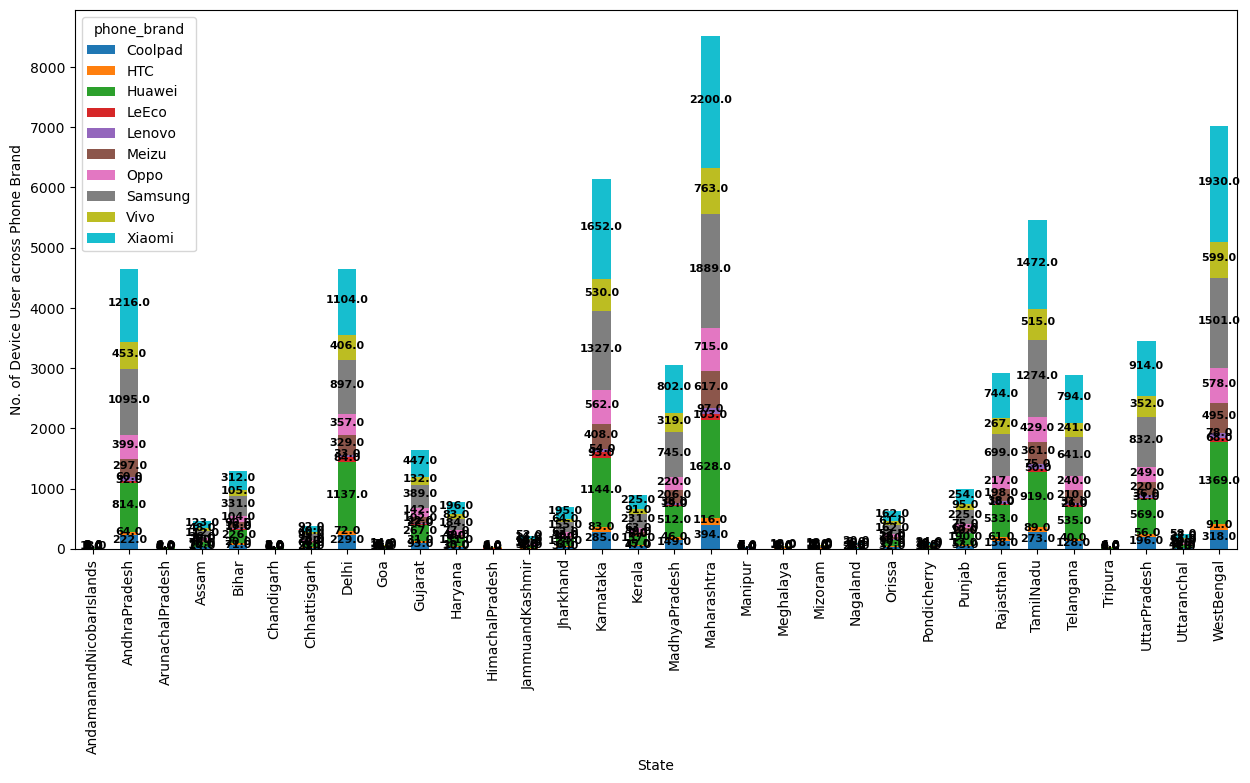

In [82]:
#Distribution of Phone Brand across each state (Considering Top 10 Phone Brand)
data2 = Consdftop10[['state','phone_brand','device_id']]
ds = data2.groupby(['state','phone_brand'])['device_id'].count().unstack()
ds1 = ds.plot(kind='bar',figsize =(15,7),stacked=True)
ds1.set_xlabel("State")
ds1.set_ylabel("No. of Device User across Phone Brand")
y_offset = -15 #To put the annotation inside bar
for bar in ds1.patches:
    ds1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)

__Observations:__
- Top 6 States with Top 3 Phone Brand are Top again - Maharastra, West Bengal, Karnataka, Tamilnadu, Andrapradesh, Delhi

__Actionable Insights:__
- Suggests to focus on the Top 10 Cities by cutomizing the offers & increasing the Outlets to expand the market

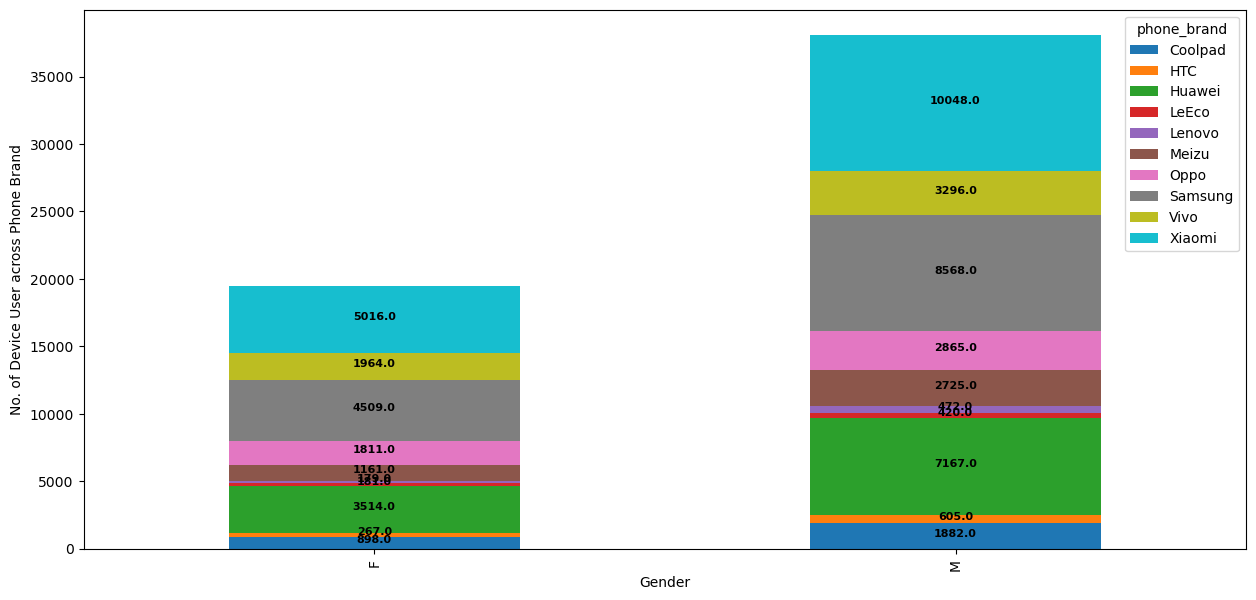

In [83]:
#Distribution of Phone Brand across Gender (Considering Top 10 Phone Brand)
data3 = Consdftop10[['gender','phone_brand','device_id']]
dg = data3.groupby(['gender','phone_brand'])['device_id'].count().unstack()
dg1 = dg.plot(kind='bar',figsize =(15,7),stacked = True)
dg1.set_xlabel("Gender")
dg1.set_ylabel("No. of Device User across Phone Brand")
y_offset = -15 #To put the annotation inside bar
for bar in dg1.patches:
    dg1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)

__Observations:__
- Top 3 Phone Brands across both Male/Female are again top 3

__Actionable Insights:__
- Suggest to make a tie up with the popular Phone Brands to have a default Accredian Network SIM locked Mobile 
- Suggests to provide "Best Offers" for the New Users of these Phone Brands

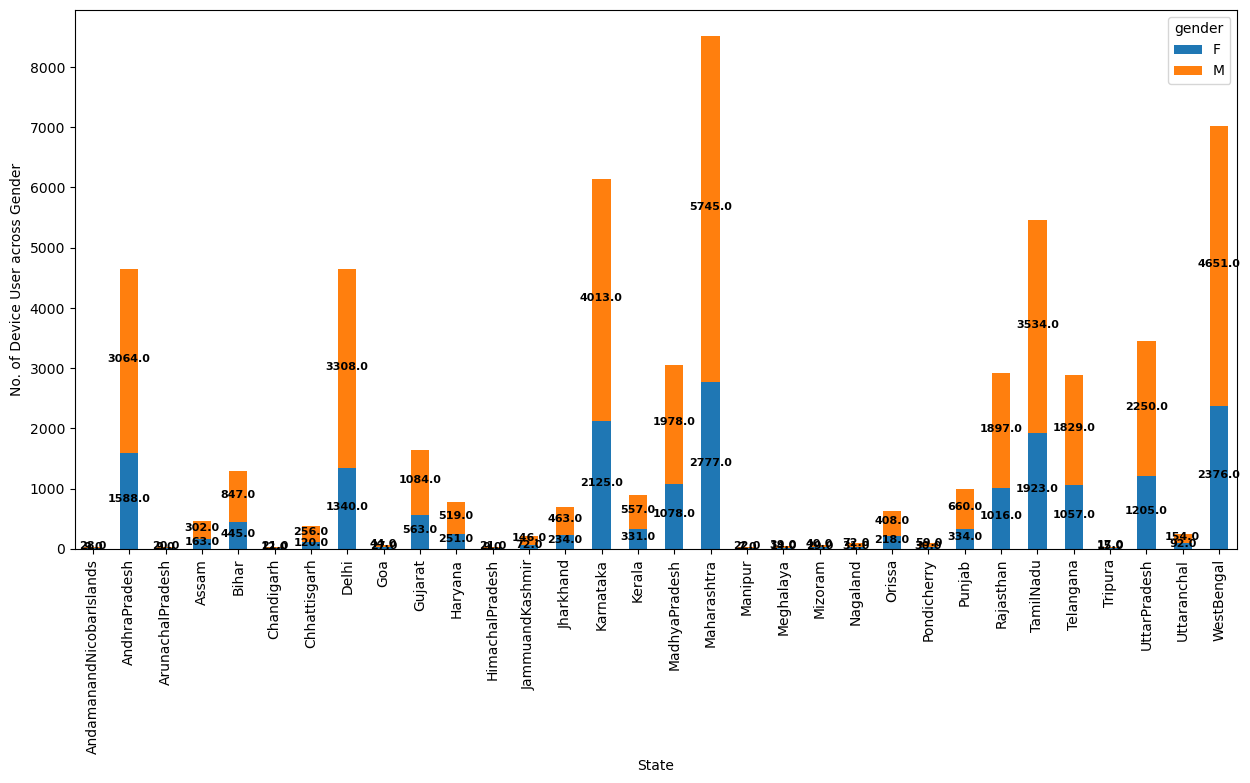

In [84]:
#Distribution of Gender across each state (Considering Top 10 Phone Brand)
data4 = Consdftop10[['gender','state','device_id']]
dgs = data4.groupby(['state','gender'])['device_id'].count().unstack()
dgs1 = dgs.plot(kind='bar',figsize =(15,7),stacked = True)
dgs1.set_xlabel("State")
dgs1.set_ylabel("No. of Device User across Gender")
y_offset = -15 #To put the annotation inside bar
for bar in dgs1.patches:
    dgs1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)

__Observations:__
- Males are more than Female across each states

__Actionable Insights:__
- Roll out more customized offers for Female

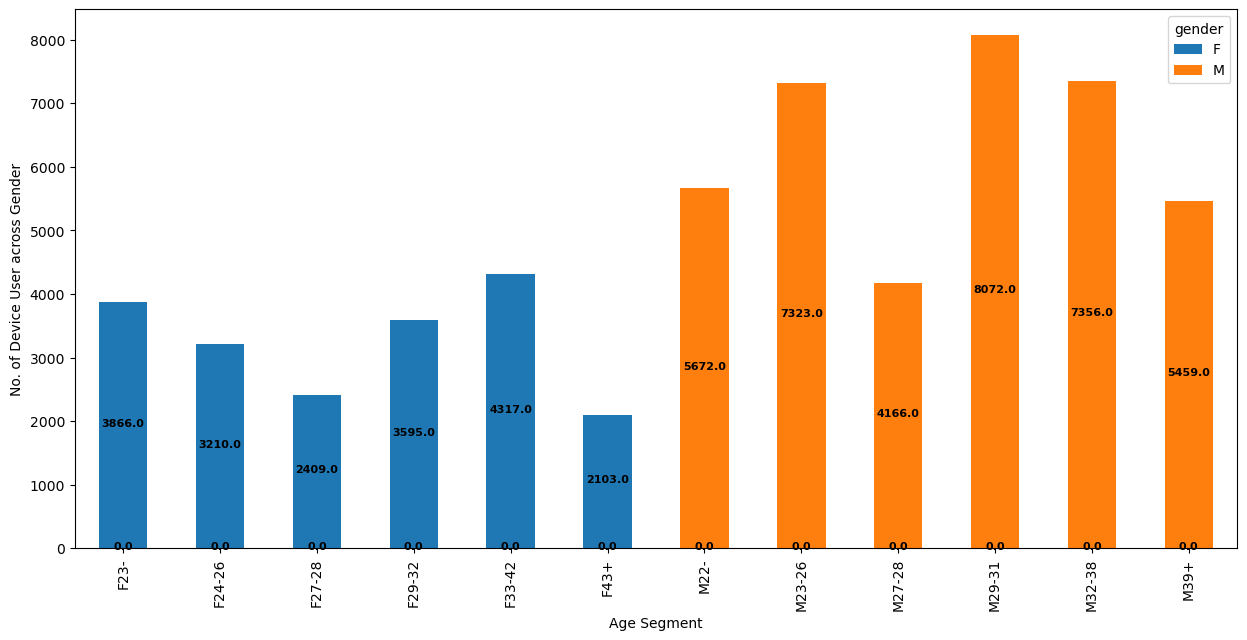

In [85]:
#Distribution of Gender across age segment (Considering Top 10 Phone Brand)
data5 = Consdftop10[['gender','group','device_id']]
dgas = data5.groupby(['group','gender'])['device_id'].count().unstack()
dgas1 = dgas.plot(kind='bar',figsize =(15,7),stacked = True)
dgas1.set_xlabel("Age Segment")
dgas1.set_ylabel("No. of Device User across Gender")
y_offset = -15 #To put the annotation inside bar
for bar in dgas1.patches:
    dgas1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)

__Observations:__
- Top 3 Male Age Segments are M29~31, M23~26 & M32~38
- Top 3 Female Age Segments are F33~42, F<23, F29~32

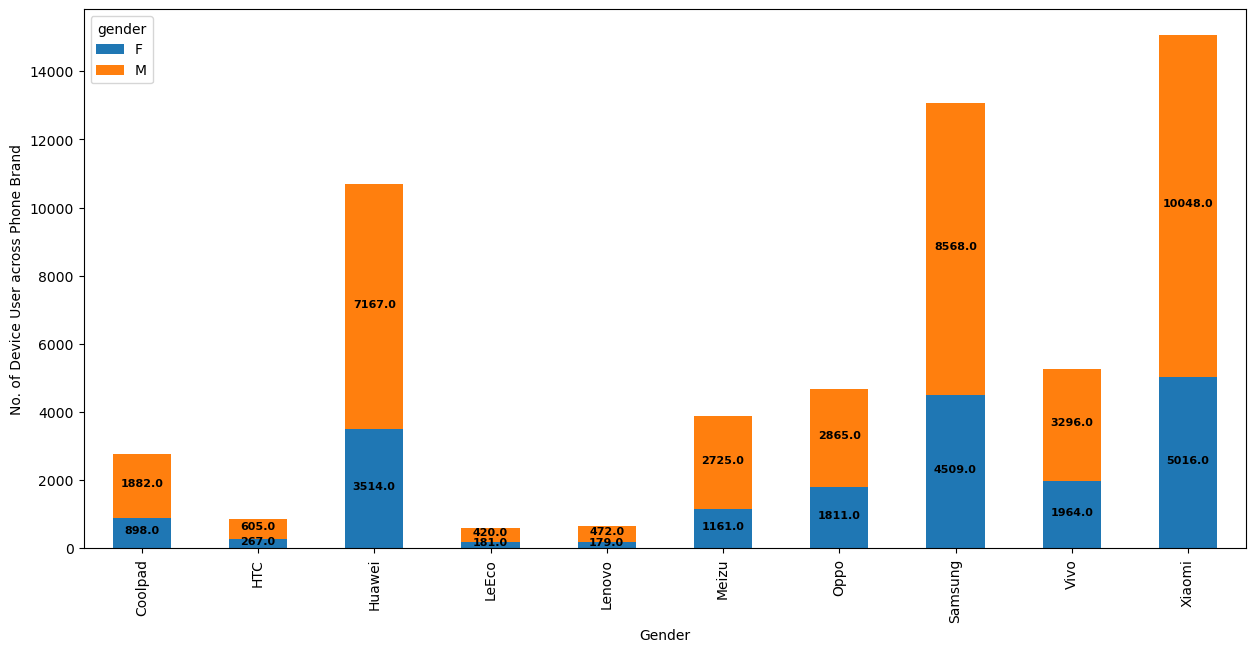

In [86]:
#Distribution of Gender across Phone Brand (Considering Top 10 Phone Brand)
data6 = Consdftop10[['gender','phone_brand','device_id']]
dgpb = data6.groupby(['phone_brand','gender'])['device_id'].count().unstack()
dgpb1 = dgpb.plot(kind='bar',figsize =(15,7),stacked = True)
dgpb1.set_xlabel("Gender")
dgpb1.set_ylabel("No. of Device User across Phone Brand")
y_offset = -15 #To put the annotation inside bar
for bar in dgpb1.patches:
    dgpb1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)

__Observations:__
- Approximately 2/3rd of Top 3 Brand Users are Male

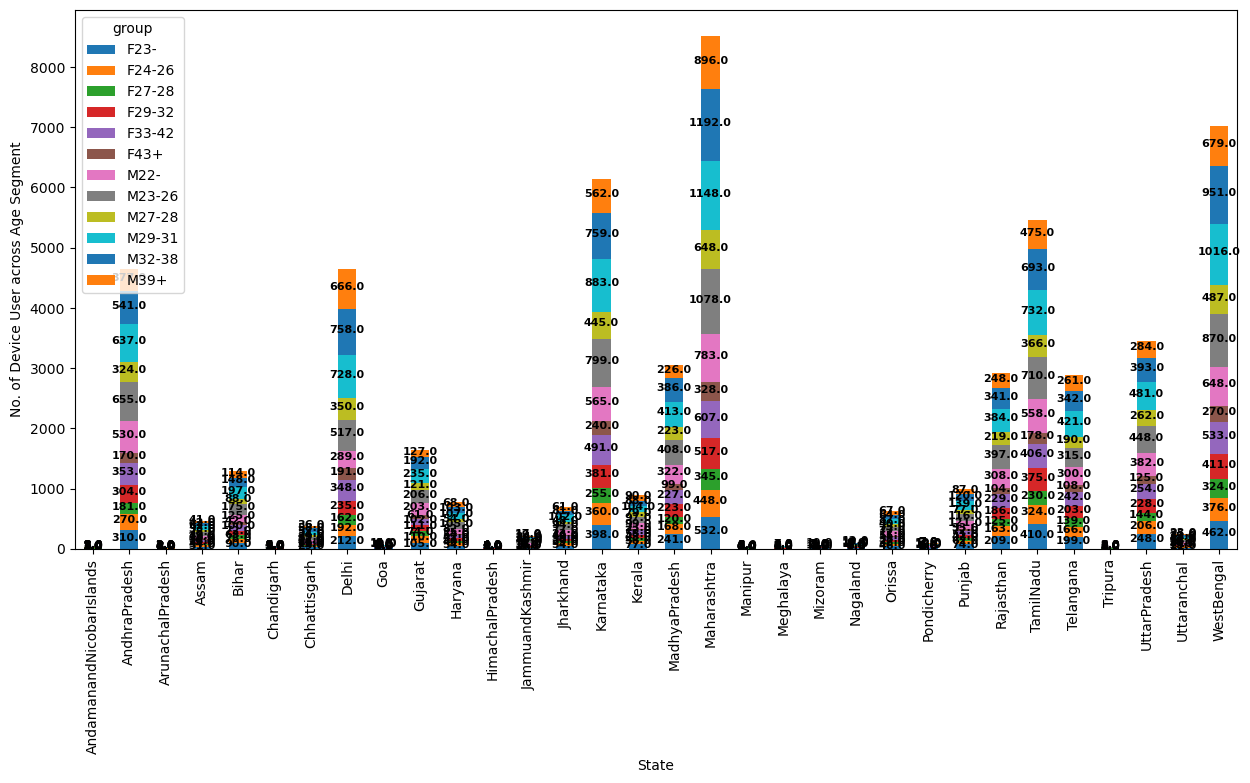

In [87]:
#Distribution of Age Segment across state (Considering Top 10 Phone Brand)
data7 = Consdftop10[['group','state','device_id']]
dass = data7.groupby(['state','group'])['device_id'].count().unstack()
dass1 = dass.plot(kind='bar',figsize =(15,7),stacked = True)
dass1.set_xlabel("State")
dass1.set_ylabel("No. of Device User across Age Segment")
y_offset = -15 #To put the annotation inside bar
for bar in dass1.patches:
    dass1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)


__Observations:__
- Top Age Segments user across the Top 6 States;
    - Maharastra : M32~38
    - West Bengal : M29~31
    - Karnataka : M29~31
    - Tamilnadu : M29~31
    - Andra Pradesh : M23~26
    - Delhi : M32~38
    
__Actionable Insights:__
- Tie up with Corporate - CUG Offers
- Customzing the Offers for working & Business Professionals

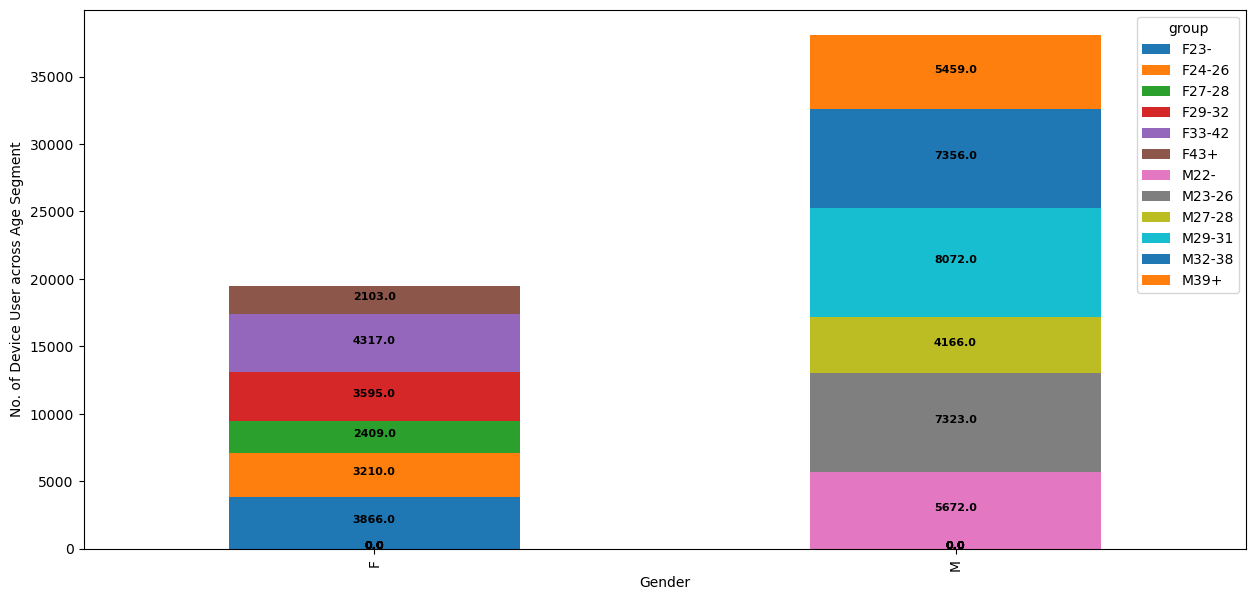

In [88]:
#Distribution of Age Segment across Gender (Considering Top 10 Phone Brand)
data8 = Consdftop10[['group','gender','device_id']]
dasg = data8.groupby(['gender','group'])['device_id'].count().unstack()
dasg1 = dasg.plot(kind='bar',figsize =(15,7),stacked = True)
dasg1.set_xlabel("Gender")
dasg1.set_ylabel("No. of Device User across Age Segment")
y_offset = -15 #To put the annotation inside bar
for bar in dasg1.patches:
    dasg1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)

__Observations:__
- Top Age Segment in Males is M29~31 & Female is F33~42

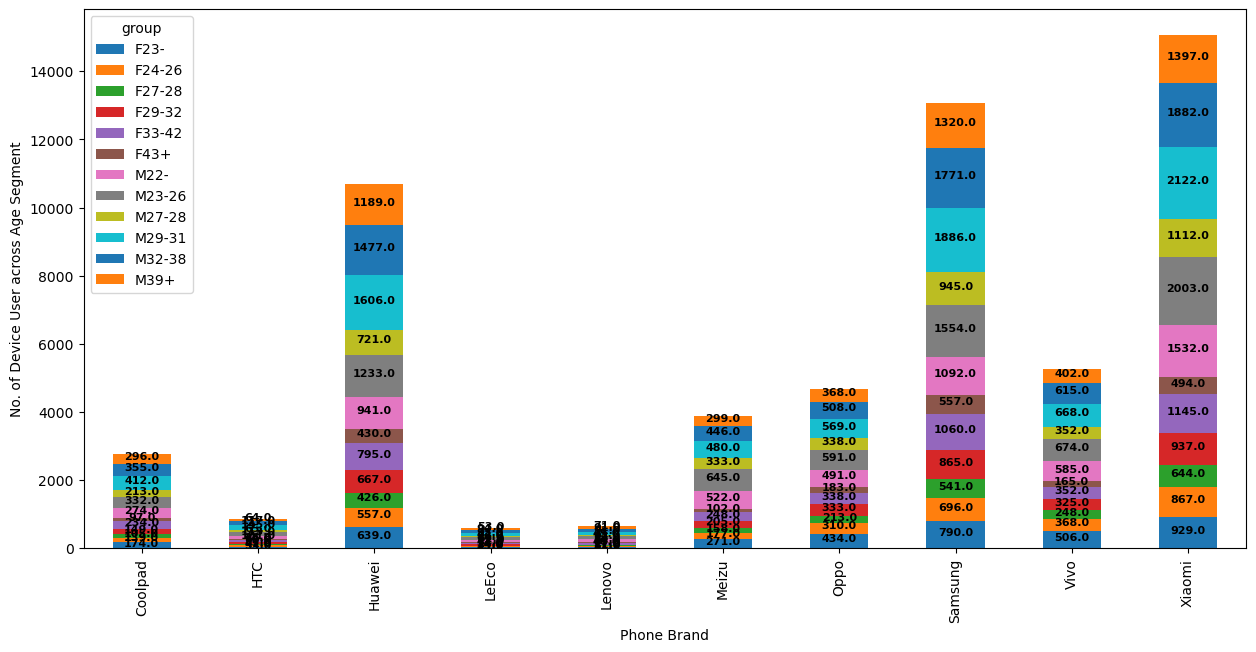

In [89]:
#Distribution of Age Segment across Phone Brand (Considering Top 10 Phone Brand)
data9 = Consdftop10[['group','phone_brand','device_id']]
daspb = data9.groupby(['phone_brand','group'])['device_id'].count().unstack()
daspb1 = daspb.plot(kind='bar',figsize =(15,7),stacked = True)
daspb1.set_xlabel("Phone Brand")
daspb1.set_ylabel("No. of Device User across Age Segment")
y_offset = -15 #To put the annotation inside bar
for bar in daspb1.patches:
    daspb1.text(bar.get_x()+bar.get_width()/2,bar.get_height()/2+bar.get_y()+y_offset,(bar.get_height()), ha = 'center',color = 'k',weight= 'bold',size = 8)

__Observations:__
- Xiaomi, Samsung & Huawei with Age Segment M29~31 is top

In [90]:
#Hourly distribution of phone calls
Consdf.head()

,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,2.973348e+18,2765368,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35.0,M32-38,优米,UIMI3
1,4.734221e+18,2955066,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30.0,M29-31,Vivo,X5M
2,-3.264500e+18,605968,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24.0,M23-26,Xiaomi,MI pad
3,5.731369e+18,448114,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26.0,M23-26,HTC,One max
4,3.388880e+17,665740,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30.0,M29-31,Xiaomi,MI 4


In [91]:
Consdf['hour'] = pd.to_datetime(Consdf['timestamp']).dt.hour

In [92]:
Consdf

,device_id,event_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,hour
0,2.973348e+18,2765368,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35.0,M32-38,优米,UIMI3,22
1,4.734221e+18,2955066,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30.0,M29-31,Vivo,X5M,20
2,-3.264500e+18,605968,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24.0,M23-26,Xiaomi,MI pad,14
3,5.731369e+18,448114,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26.0,M23-26,HTC,One max,13
4,3.388880e+17,665740,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30.0,M29-31,Xiaomi,MI 4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252882,-1.937028e+18,2687452,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra,F,38.0,F33-42,Xiaomi,红米1S,23
3252883,3.345851e+18,1051580,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra,M,22.0,M22-,一加,One,5
3252884,-6.406040e+18,1316227,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi,M,37.0,M32-38,Samsung,Galaxy Grand 2,16
3252885,-2.920741e+18,381262,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh,M,30.0,M29-31,Xiaomi,红米,17


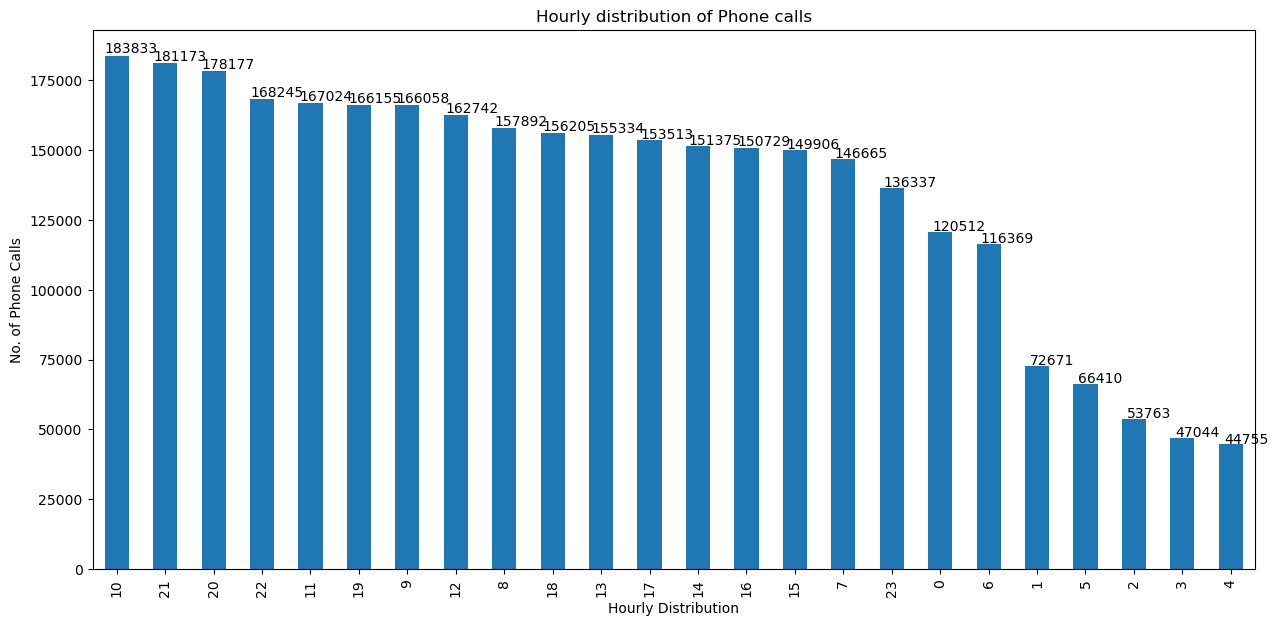

In [93]:
#Hourly distribution of phone calls
Bars = Consdf['hour'].value_counts().plot(kind='bar',figsize=(15,7),title ="Hourly distribution of Phone calls")
plt.xlabel("Hourly Distribution")
plt.ylabel("No. of Phone Calls")
for p in Bars.patches:
    Bars.annotate(str(p.get_height()),(p.get_x()*1.005,p.get_height()*1.005))
plt.show()

__Observations:__
- Peak Usage Hour : __10 o'clock__ in the morning, followed by 8~10 PM in the evening 
- Lowest Usage Hour : __1~5 AM__ 

__Actionable Insights:__
- Offers with Customized Hour Package can be rolled out

In [94]:
df_lat_long_map = Consdf[["latitude", "longitude", "state"]]

In [95]:
df_lat_long_map.head()

,latitude,longitude,state
0,28.730140,77.225676,Delhi
1,22.660325,88.388361,WestBengal
2,28.757906,77.256809,Delhi
3,13.153332,80.343613,TamilNadu
4,23.842609,85.997745,Jharkhand


In [96]:
df_lat_long_map.duplicated().sum()

3192022

In [97]:
df_lat_long = df_lat_long_map.drop_duplicates()

In [98]:
df_lat_long

,latitude,longitude,state
0,28.730140,77.225676,Delhi
1,22.660325,88.388361,WestBengal
2,28.757906,77.256809,Delhi
3,13.153332,80.343613,TamilNadu
4,23.842609,85.997745,Jharkhand
...,...,...,...
3251794,13.150984,80.290241,TamilNadu
3251950,19.049232,72.886717,Maharashtra
3252462,13.065801,77.633307,Karnataka
3252731,26.947862,76.422242,Rajasthan


In [101]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


<Axes: >

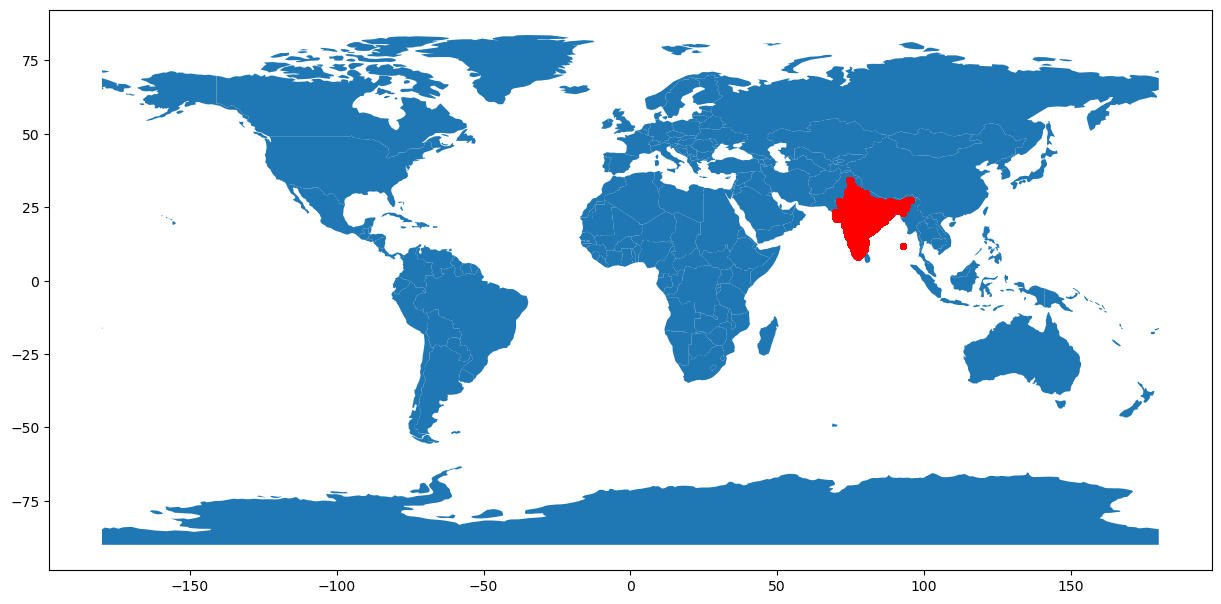

In [102]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_lat_long['longitude'], df_lat_long['latitude'])]
gdf = GeoDataFrame(df_lat_long, geometry=geometry)

# This is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(figsize=(15,15)), marker='o', color='red', markersize=15)

__Observations:__
- All Users are mapped & No Strange Values

## **9. Summarization**

## **9.1. Conclusion**

In [103]:
- This Project helped us to understand the User Behavious across Age Segment, Gender & State.
- Total of 3252887 event id with 60865 Device id were provided which were analysed.
- Top 10 States in Mobile usage are Maharastra, West Bengal, Karnataka, Tamilnadu, Andra Pradesh, Delhi, Uttra Pradesh, 
Madhya Pradesh, Rajasthan & Telegana
- Males are the Most users
- Top 3 Popular brand across Users are Xiaomi, Samsung & Hauwei
- Peak Hour Usage is 10 o'clock in the morning followed by 8~10 in the evening
- Lowest Usage is on night 1~5 AM

Following the below actionable insight, the market can be expanded by Accredian.

SyntaxError: unterminated string literal (detected at line 7) (3737046819.py, line 7)

## **9.2. Actionable Insights**

- Maharastra has a Highest User. Suggest to focus on the Top 10 Cities by cutomizing the Offers to expand the Market
- For Regions with lowest user, Suggest to provide Customized offer considering ROI
- Suggest to make a tie up with the popular Phone Brands to have a default Accredian Network SIM locked Mobile 
- Suggests to provide "Best Offers" for the New Users of these Phone Brands
- Roll Out more Customized offers for Females
- Tie up with Corporate - CUG Offers
- Customzing the Offers for working & Business Professionals
- Offers with Customized Hour Package can be rolled out

# __End of Project, Thanks for Project to explore more practically from Gr 1001!!__